# Project: Writing a Data Scientist Blog Post - Udacity
This is a project about data understanding with CRISP_DM processing in Nano Program Degree of Udacity.

## Business Understanding
There are 3 questions that we need answer:
1. Top 5 countries have most professional developers
2. Top 5 countries have most person who want to work with Python
3. Compare average salary of person who used to work with Python language with others.

## Data Understanding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv("survey_results_public.csv")
schema = pd.read_csv("survey_results_schema.csv")

In [39]:
df.head(2)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0


In [40]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In order to answer theses questions, we only consider some special features. Specially, we will
check: Country, Professional, HaveWorkLanguage, WantWorkLanguage and Salary

In [41]:
new_df = df[["Respondent", "Country", "Professional", "HaveWorkedLanguage", "WantWorkLanguage", "Salary"]]

From now, we only analyze new_df DataFrame

In [42]:
new_df.describe()

,Respondent,Salary
count,51392.000000,12891.000000
mean,25696.500000,56298.480641
std,14835.736854,39880.905277
min,1.000000,0.000000
25%,12848.750000,26440.371839
50%,25696.500000,50000.000000
75%,38544.250000,80000.000000
max,51392.000000,197000.000000


In [43]:
n_rows = new_df.shape[0]
n_cols = new_df.shape[1]
print("Number of rows: {}".format(n_rows))
print("Number of columns: {}".format(n_cols))

Number of rows: 51392
Number of columns: 6


#### Describe features of data

In [44]:
def get_description(column_name, schema=schema):
    '''
    INPUT
        schema - pandas dataframe with the schema of the developers survey
        column_name - string - the name of the column you would like to know about
    OUTPUT
        desc - string - the description of the column
    '''
    return '\033[91m'+ f"{column_name}: " + '\033[0m' +\
        list(schema[schema['Column'] == column_name]['Question'])[0]

In [45]:
for i in range(len(new_df.columns)):
    print(get_description(new_df.columns[i]))

Respondent: Respondent ID number
Country: In which country do you currently live?
Professional: Which of the following best describes you?
HaveWorkedLanguage: Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?
WantWorkLanguage: Which of the following languages have you done extensive development work in over the past year, and which do you want to work in over the next year?
Salary: What is your current annual base salary, before taxes, and excluding bonuses, grants, or other compensation?


## Prepare Data
1. Check missing values
2. Drop Data

#### 1. Check missing data

In [46]:
new_df.isnull().sum()

Respondent                0
Country                   0
Professional              0
HaveWorkedLanguage    14767
WantWorkLanguage      17621
Salary                38501
dtype: int64

Features such as: HaveWorkedLanguage, WantWorkLanguage have not too much missing values. So we can drop respondents that have 2 columns are null. And for feature "Salary", we can also do the same, because it's has little effect on whole salary.

#### 2. Drop missing values

In [47]:
drop_df = new_df.dropna(axis=0)

In [49]:
drop_df

,Respondent,Country,Professional,HaveWorkedLanguage,WantWorkLanguage,Salary
2,3,United Kingdom,Professional developer,Java; PHP; Python,C; Python; Rust,113750.000000
14,15,United Kingdom,Professional developer,Assembly; C; C++,Assembly; C; C++; Python,100000.000000
17,18,United States,Professional developer,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,Assembly; Clojure; Go; JavaScript; Rust; Swift...,130000.000000
22,23,Israel,Professional developer,Java,Java; Scala; Swift,100764.000000
25,26,United States,Professional developer,Java; Scala,JavaScript; Scala,175000.000000
...,...,...,...,...,...,...
51371,51372,Netherlands,Professional developer,Go; JavaScript; Python,Elixir; JavaScript; Python; Scala,74193.548387
51378,51379,Cyprus,Professional developer,JavaScript; Objective-C; Python; Swift,CoffeeScript; JavaScript; Python; Ruby,107526.881720
51382,51383,France,Professional developer,C#; JavaScript; TypeScript,JavaScript,32258.064516
51387,51388,United States,Professional developer,C#; JavaScript; Python; SQL; VB.NET; VBA,C#; Python; R; Ruby; Rust; Scala; TypeScript; ...,58000.000000


In [48]:
drop_df.isnull().sum()

Respondent            0
Country               0
Professional          0
HaveWorkedLanguage    0
WantWorkLanguage      0
Salary                0
dtype: int64

## Evaluation

In [51]:
ques1_df = new_df.Country[new_df.Professional == "Professional developer"].value_counts()

In [52]:
ques1_df[:5]

United States     8310
India             3438
United Kingdom    3302
Germany           2767
Canada            1605
Name: Country, dtype: int64

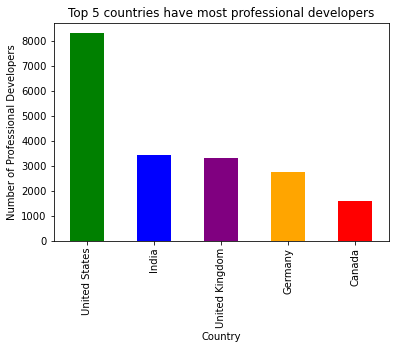

In [53]:
ques1_df[:5].plot(kind="bar", title="Top 5 countries have most professional developers",\
             xlabel="Country", ylabel="Number of Professional Developers",\
             color=["g", "b", "purple", "orange", "r"])

#### 1. Top 5 countries have most professional developers: US, India, UK, Germany and Canada
<table>
<tr float="left">
   <td><img src="images/ques1.PNG"></td>
   <td><img src="images/output1.PNG"/></td>
</tr>
    </table>

In [54]:
drop_df["haveworkedlanguagepython"] = drop_df.apply(lambda x: 1 if \
        "Python" in str(x["HaveWorkedLanguage"]) else 0, axis=1)

C:\Users\phucht2\AppData\Local\Temp/ipykernel_15432/1603197917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drop_df["haveworkedlanguagepython"] = drop_df.apply(lambda x: 1 if \


In [55]:
drop_df.head(2)

,Respondent,Country,Professional,HaveWorkedLanguage,WantWorkLanguage,Salary,haveworkedlanguagepython
2,3,United Kingdom,Professional developer,Java; PHP; Python,C; Python; Rust,113750.0,1
14,15,United Kingdom,Professional developer,Assembly; C; C++,Assembly; C; C++; Python,100000.0,0


In [56]:
ques2_df = drop_df.Country[drop_df.haveworkedlanguagepython == 1].value_counts()

In [57]:
ques2_df[:5]

United States     1102
United Kingdom     330
Germany            241
Canada             199
India              140
Name: Country, dtype: int64

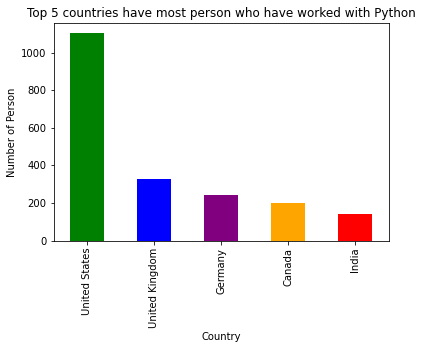

In [60]:
ques2_df[:5].plot(kind="bar", title="Top 5 countries have most person who have worked with Python",\
             xlabel="Country", ylabel="Number of Person",\
             color=["g", "b", "purple", "orange", "r"])

#### 2. Top 5 countries have most person who have worked Python: US, UK, Germany, India and Canada
<table>
<tr float="left">
    <td><img src="images/ques2.PNG"/></td>
    <td><img src="images/output2.PNG"/></td>
</tr>
</table>

In [61]:
ques3_python_df = drop_df.Salary[drop_df.haveworkedlanguagepython == 1].mean()

In [62]:
ques3_other_df = drop_df.Salary[drop_df.haveworkedlanguagepython != 1].mean()

In [63]:
ques3_df = pd.DataFrame({"Python": [str(int(ques3_other_df)) + "$/ year"], \
                         "Not Python":[str(int(ques3_python_df)) + "$/ year"]}, index=None)

In [64]:
ques3_df

,Python,Not Python
0,55059$/ year,61792$/ year


#### 3. Compare average salary of person who used to work with Python language with Others


<img src="images/output3.PNG">
It can be seen that, average salary of person who used to work with Python language is less than the average salary of person who used to work with other languages